In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuraltda.topology3 as tp3
%matplotlib inline

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
def shuffle_trial_spikes(spikes, stim_start, stim_end):
    # trial_spikes is a list of (sample, id) spikes
    # for each spike, generate a new sample in range stim_start, stim_end
    trial_spikes = []
    tp3.spikes_in_interval(spikes, stim_start, stim_end, trial_spikes)
    new_spikes_times = []
    new_spikes_ids = []
    for spike in trial_spikes:
        new_sample = np.random.randint(stim_start, high=stim_end+1)
        new_spikes_times.append(new_sample)
        new_spikes_ids.append(spike[1])
    out_spikes = np.vstack((new_spikes_times, new_spikes_ids)).T
    out_spikes_ind = np.argsort(out_spikes[:, 0])
    
    return out_spikes[out_spikes_ind, :]

def get_betti_curve(spikes, stim_name, stim_start, stim_end, win_len, fs, thresh, t, dim, betti_curve_dict, times):
    betti_nums = tp3.compute_bettis(spikes, stim_start, stim_end, win_len, fs, thresh=4.0)

    betti_func = tp3.betti_curve_func(betti_nums, dim, stim_start, stim_end, fs, t_in_seconds=True)
    betti_curve = betti_func(t)
  
    if stim_name not in betti_curve_dict.keys():
        betti_curve_dict[stim_name] = [] 
        times[stim_name] = []
    betti_curve_dict[stim_name].append(betti_curve)
    times[stim_name].append(t)
    

In [6]:
kwikfile = '/home/brad/experiments/B1146/sorted/block-4-AP-2300-ML-400-Z-1750/experiment1_101.kwik'
spikes = tp3.kwik_get_spikes(kwikfile)
trials = tp3.kwik_get_trials(kwikfile)

In [7]:
import tqdm
trial_subset = trials
fs = 30000
win_len = np.round(0.01 * fs)
dim = 2
thresh = 4.0

betti_curves = {}
shuffled_betti_curves = {}
times = {}
shuffled_times = {}
for tr in tqdm.tqdm(trial_subset):
    stim_start = tr[1]
    stim_end = tr[2]
    stim_name = tr[0]

    t = np.linspace(0, stim_end-stim_start, 2000) / fs
    get_betti_curve(spikes, stim_name, stim_start, stim_end, win_len, fs, thresh, t, dim, betti_curves, times)

    shuffled_trial_spikes = shuffle_trial_spikes(spikes, stim_start, stim_end)
    get_betti_curve(shuffled_trial_spikes, stim_name, stim_start, stim_end, win_len, fs, thresh, t, dim, shuffled_betti_curves, shuffled_times)


100%|██████████| 1020/1020 [15:08<00:00,  1.12it/s]


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


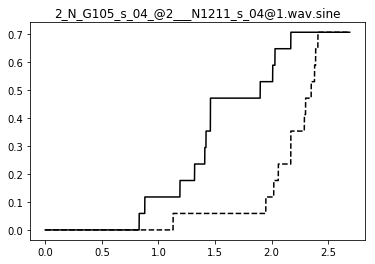

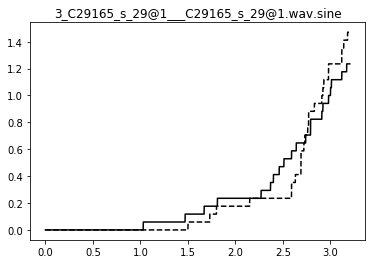

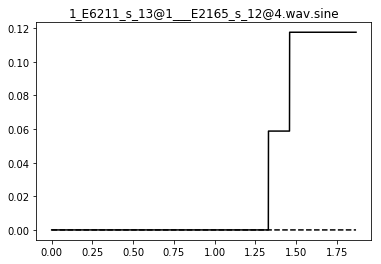

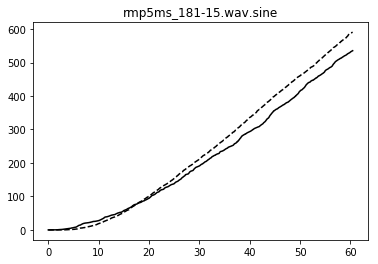

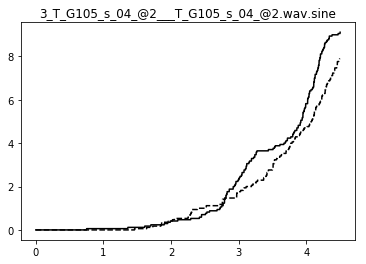

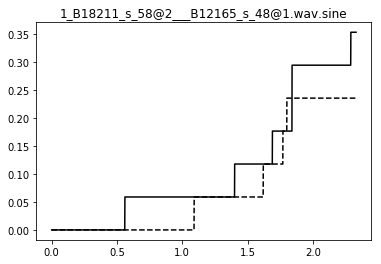

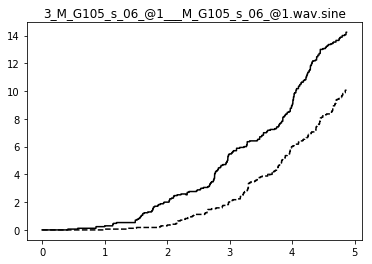

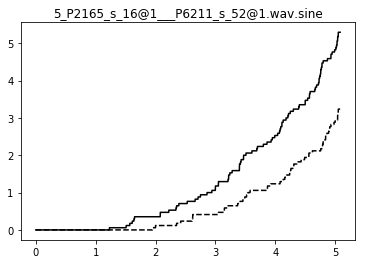

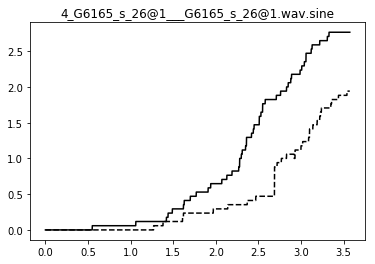

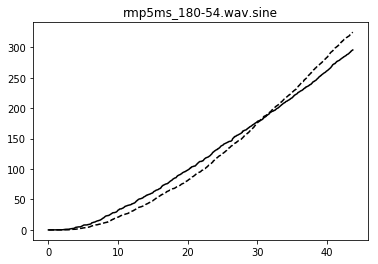

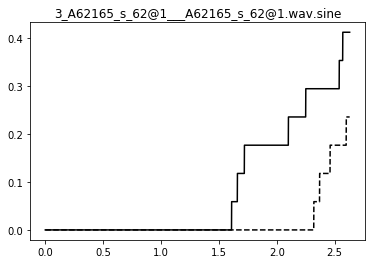

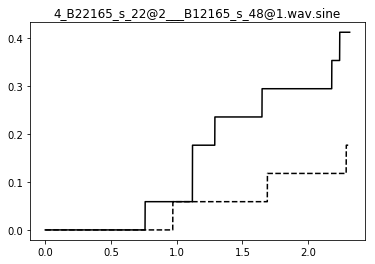

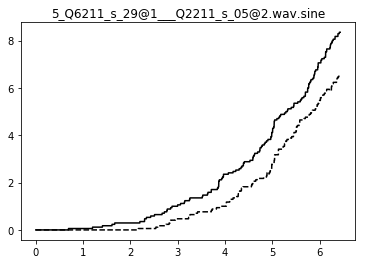

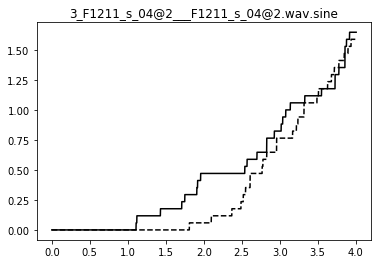

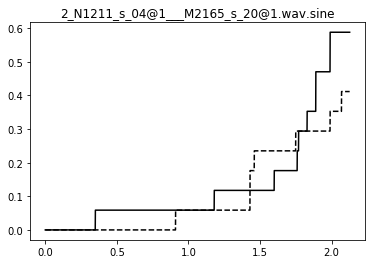

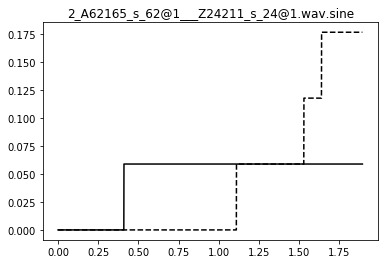

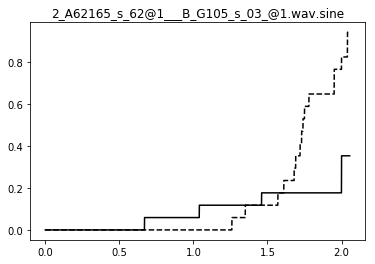

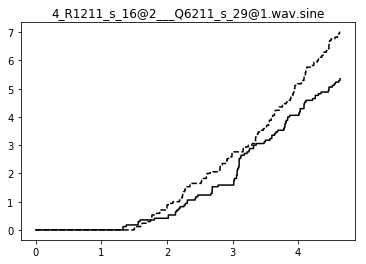

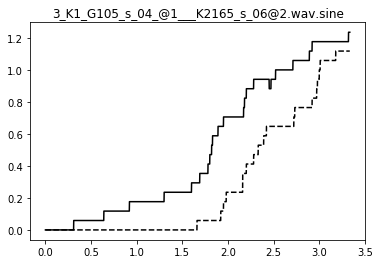

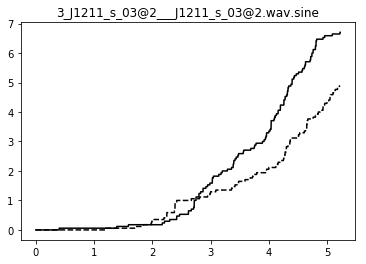

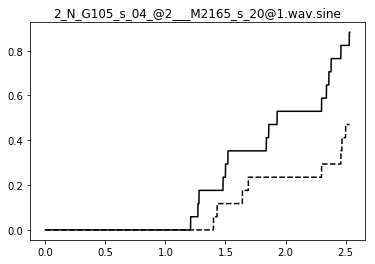

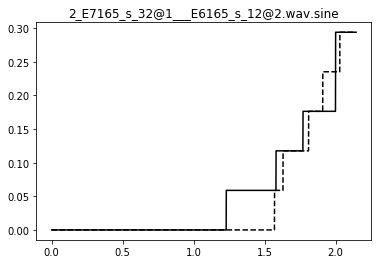

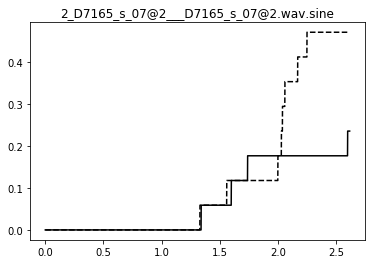

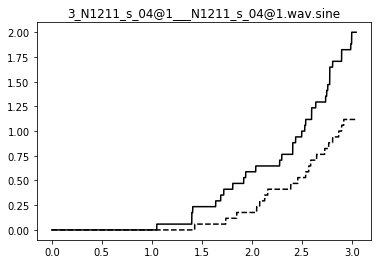

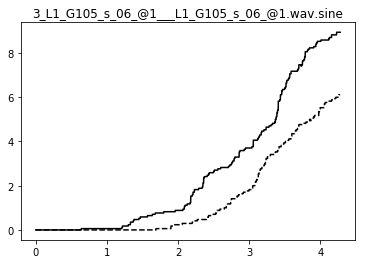

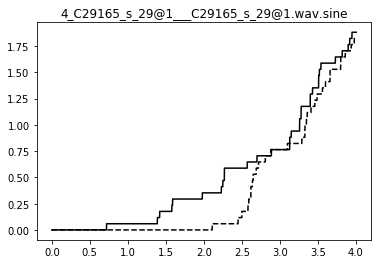

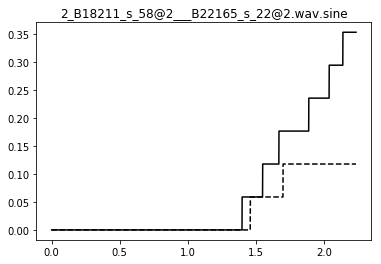

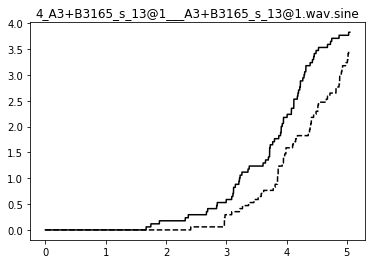

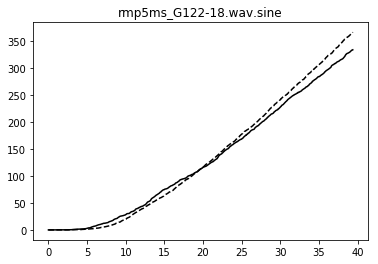

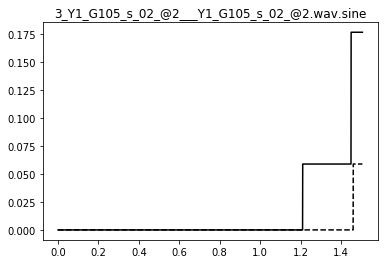

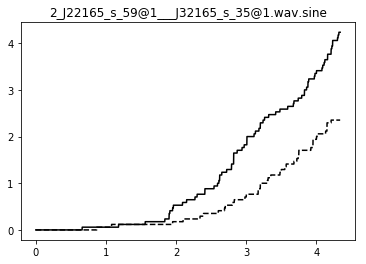

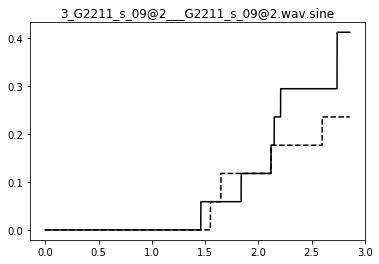

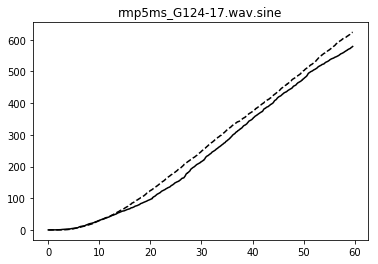

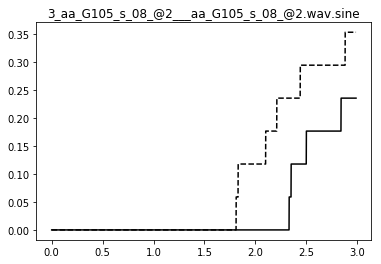

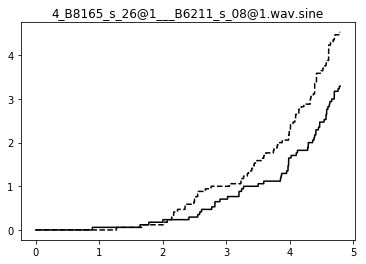

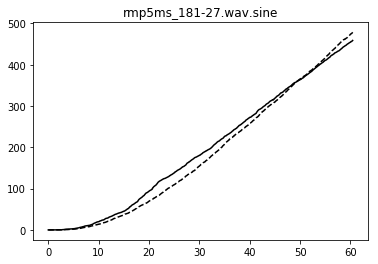

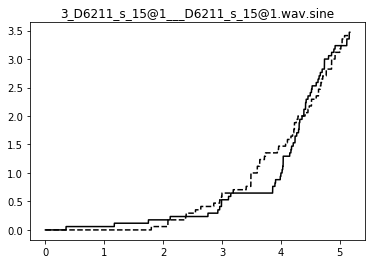

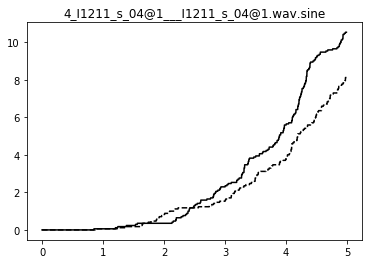

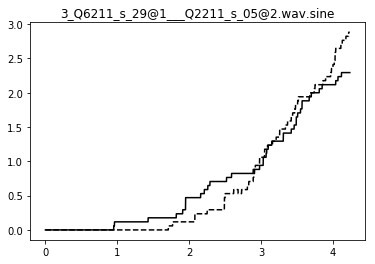

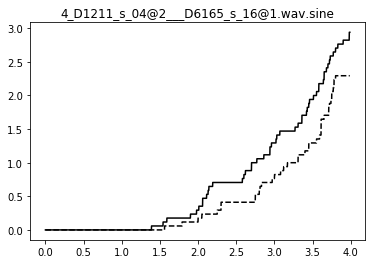

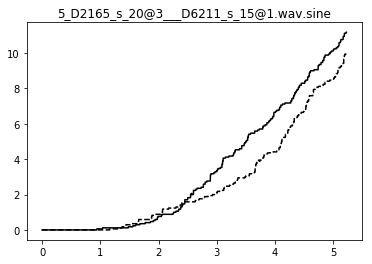

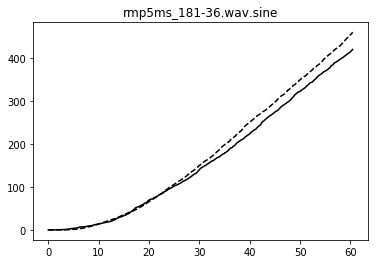

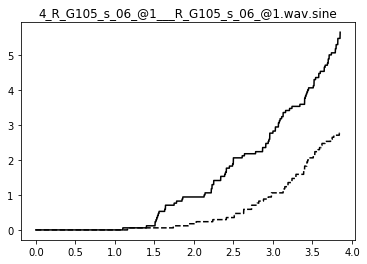

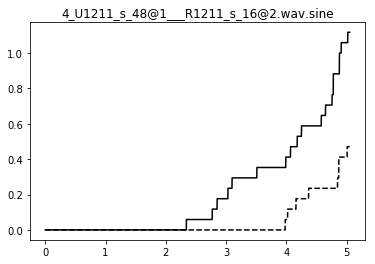

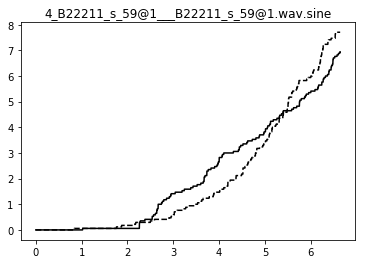

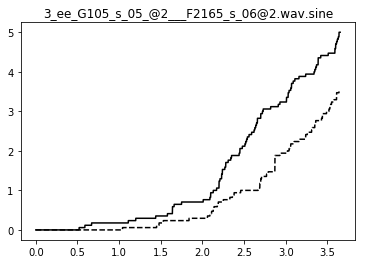

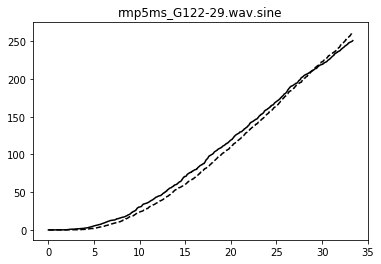

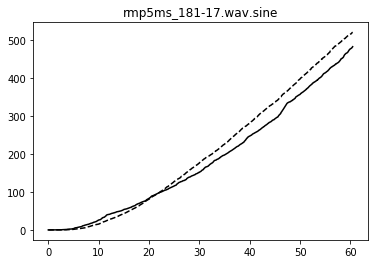

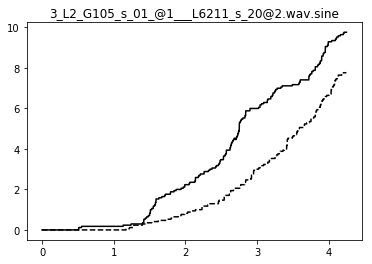

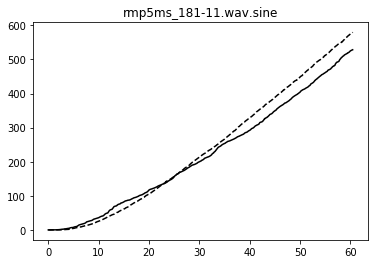

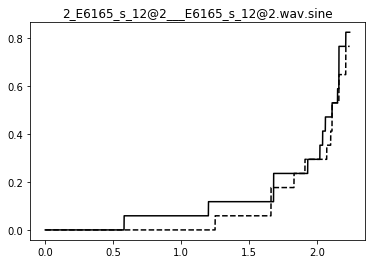

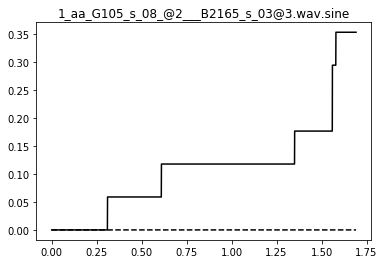

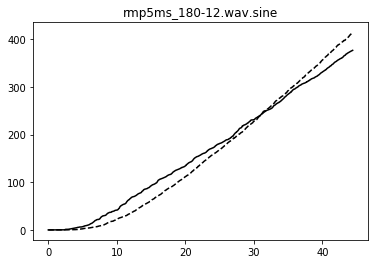

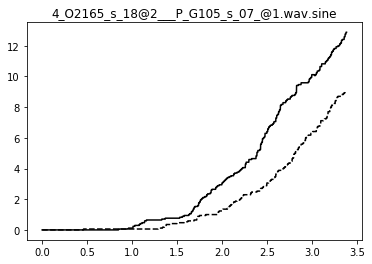

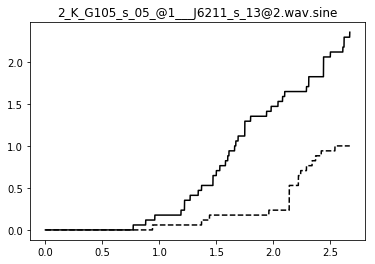

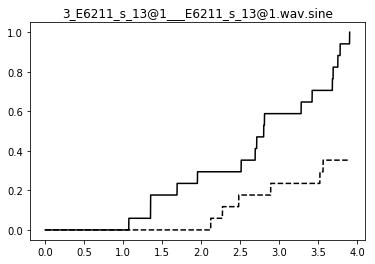

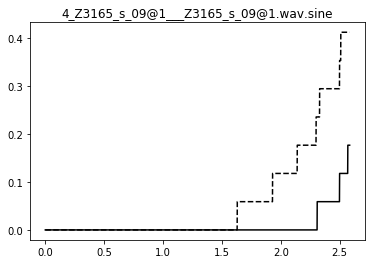

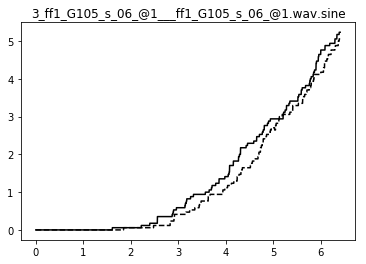

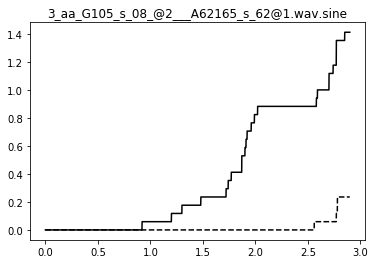

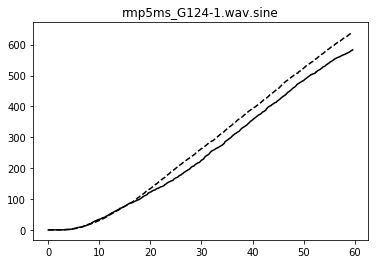

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

for stim in shuffled_betti_curves.keys():
    c = np.vstack(betti_curves[stim])
    c = np.mean(c, axis=0)
    cs = np.vstack(shuffled_betti_curves[stim])
    cs = np.mean(cs, axis=0)
    plt.figure()
    plt.plot(times[stim][0], c, 'k')
    plt.plot(times[stim][0], cs, 'k--')
    plt.title(stim)
    

In [ ]:
shuffled_betti_curves